## Parametry

In [13]:
SERIES_LENGHT = 72
VALUES_DATATYPE = 'float16'
LEARNING_RATE = 0.001
EPOCHS = 15
BATCH_SIZE = 32

## Wczytanie danych z pliku

In [14]:
import numpy as np

data = np.load("../resources/" + "data_%s_series_%d.npy" % (VALUES_DATATYPE, SERIES_LENGHT))
print(data)
print(data.shape)

[[[-0.2517  -0.2258   0.2161  ...  0.       0.       0.     ]
  [-0.2517  -0.2478   0.2386  ...  0.       0.       0.     ]
  [-0.2517  -0.2698   0.1708  ...  0.       0.       0.     ]
  ...
  [ 5.336   -0.4893  -0.1232  ...  0.       0.       0.     ]
  [ 0.1473  -0.555   -0.2815  ...  0.       0.       0.     ]
  [-0.2517  -0.4233  -0.3042  ...  0.       0.       0.     ]]

 [[-0.2517  -0.3794  -0.5303  ...  0.       0.       0.     ]
  [-0.2517  -0.4453  -0.7793  ...  0.       0.       0.     ]
  [-0.2517  -0.577   -0.734   ...  0.       0.       0.     ]
  ...
  [-0.2517  -1.038   -1.299   ...  0.       0.       0.     ]
  [-0.2517  -0.8843  -1.187   ...  0.       0.       0.     ]
  [-0.05212 -0.621   -1.028   ...  0.       0.       0.     ]]

 [[ 1.943   -0.599   -0.03278 ...  0.       0.       0.     ]
  [-0.2517  -0.577   -0.1232  ...  0.       0.       0.     ]
  [-0.05212 -0.577   -0.1685  ...  0.       0.       0.     ]
  ...
  [-0.2517  -1.455   -1.458   ...  0.       0.  

## Wydzielenie zbiorów

In [15]:
from sklearn.model_selection import train_test_split

X = np.swapaxes(data[:, :SERIES_LENGHT - 1, :],1,2)
Y = np.swapaxes(data[:, SERIES_LENGHT - 1:, :],1,2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print("Dane treningowe: "+ str(X_train.shape))

Dane treningowe: (99435, 37, 71)


## Definicja sieci

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow_core.python.keras.optimizer_v2.rmsprop import RMSProp
from script.main.loss_functions import *

model = Sequential()
model.add(LSTM(units=128, activation="relu", return_sequences=True, input_shape=(37, SERIES_LENGHT - 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dense(19))
model.compile(loss=mean_square_loss_func, optimizer=RMSProp(lr=LEARNING_RATE), metrics=['accuracy'])

## Diagram sieci

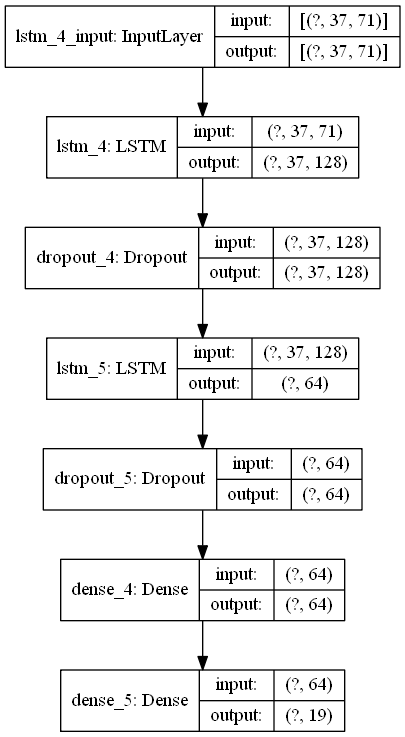

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Uczenie

In [18]:
model.fit(X_train,Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)

Train on 99435 samples
Epoch 1/15
99435/99435 - 138s - loss: 147.0407 - accuracy: 0.1924
Epoch 2/15
99435/99435 - 140s - loss: 4.3431 - accuracy: 0.2165
Epoch 3/15
99435/99435 - 144s - loss: 0.2723 - accuracy: 0.2387
Epoch 4/15
99435/99435 - 145s - loss: 0.3734 - accuracy: 0.2646
Epoch 5/15
99435/99435 - 141s - loss: 0.1851 - accuracy: 0.2834
Epoch 6/15
99435/99435 - 145s - loss: 0.1698 - accuracy: 0.3169
Epoch 7/15
99435/99435 - 148s - loss: 0.1586 - accuracy: 0.3532
Epoch 8/15
99435/99435 - 147s - loss: 0.1509 - accuracy: 0.3727
Epoch 9/15
99435/99435 - 146s - loss: 0.1510 - accuracy: 0.3755
Epoch 10/15
99435/99435 - 146s - loss: 0.1378 - accuracy: 0.3992
Epoch 11/15
99435/99435 - 141s - loss: 0.1345 - accuracy: 0.4112
Epoch 12/15
99435/99435 - 142s - loss: 0.3245 - accuracy: 0.4148
Epoch 13/15
99435/99435 - 142s - loss: 0.1224 - accuracy: 0.4285
Epoch 14/15
99435/99435 - 142s - loss: 0.1243 - accuracy: 0.4452
Epoch 15/15
99435/99435 - 142s - loss: 0.1224 - accuracy: 0.4635


## Zapis modelu od pliku

In [31]:
model.save("../resources/trained_model.h5", save_format='tf')

## Zapis danych testowych do pliku

In [33]:
np.save("../resources/test_data/X_test", X_test)
np.save("../resources/test_data/Y_test", Y_test)

## Wykres zmiennosci temperatur

### Prawdziwe temperatury

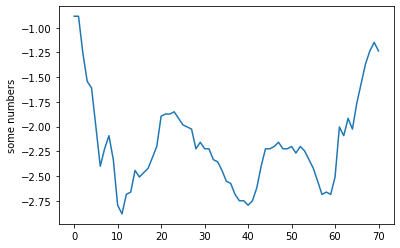

In [28]:
import matplotlib.pyplot as plt
plt.plot(np.squeeze(X_test[0:1:,1:2,:]))
plt.ylabel('some numbers')
plt.show()

### Przewidziane temperatury

In [29]:
temps = []
temp_row = np.array(X_test[0:1,:,:]) 
for i in range(24):
    predicted = model.predict(temp_row)
    
    predicted[0,7] = int(i==0 or i==1)
    predicted[0,8] = int(i==2 or i==3)
    predicted[0,9] = int(i==4 or i==5)
    predicted[0,10] = int(i==6 or i==7)
    predicted[0,11] = int(i==8 or i==9)
    predicted[0,12] = int(i==10 or i==11)
    predicted[0,13] = int(i==12 or i==13)
    predicted[0,14] = int(i==14 or i==15)
    predicted[0,15] = int(i==16 or i==17)
    predicted[0,16] = int(i==18 or i==19)
    predicted[0,17] = int(i==20 or i==21)
    predicted[0,18] = int(i==22 or i==23)
    
    predicted[0,19] = temp_row[0, 19, 0]
    predicted[0,20] = temp_row[0, 20, 0]
    predicted[0,21] = temp_row[0, 21, 0]
    predicted[0,22] = temp_row[0, 22, 0]
    predicted[0,23] = temp_row[0, 23, 0]
    predicted[0,24] = temp_row[0, 24, 0]
    
    predicted = np.expand_dims(predicted, axis=2)
    temp_row = np.append(arr=temp_row, values=predicted, axis=2)
    temp_row = temp_row[:,:,1:]
print(temp_row.shape)


plt.plot(np.squeeze(temp_row[:,1:2,:]))
plt.ylabel('some numbers')
plt.show()

IndexError: index 19 is out of bounds for axis 1 with size 19

## 